In [1]:
import copy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Q1
type(11/7)

float

In [3]:
11/7

1.5714285714285714

In [4]:
11//7

1

In [5]:
#Q2
fruit_list = ["apple", "pear", "banana", "watermelon"]
fruit_list_length = len(fruit_list) # Don't hardcode this. Use a Python built-in

minimum = 2
maximum = 5
in_range = fruit_list_length >= minimum and fruit_list_length <= maximum # True if the number of fruits in fruit_list is inside the minimum-to-maximum range
in_range


True

In [6]:
#Q3
filepaths = "TESTING_FILE1.C5V-TESTING_FILE2.CSV-TESTING_FILE3.CSV"
file_list = filepaths.split("-")
csv_count = 0
for file in file_list:
    if "CSV" in file:
        csv_count += 1
csv_count


2

In [7]:
def multiply(*args):
    if len(args) == 2:
        return args[0] * args[1]
    elif len(args) == 1:
        return args[0] * 2
    else: 
        print("One or two arguments are expected.")

In [8]:
#Q4
multiply(5)

10

In [9]:
def smart_multiply(nums):
    total = 1
    for i in nums: 
        if i <= 0: 
            continue
        elif total > 100:
            break
        total *= i
    return total

In [10]:
#Q5
smart_multiply([4, -2, 0, 5, 5, 2, 7, -2])

200

In [11]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]


In [12]:
{"A":1, "B":2} == {"B":2, "A":1}

True

In [13]:
#Q6
coord1["z"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [14]:
#Q7
rows[-1][-1]["y"]

1

In [15]:
#Q8
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows


[[1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [16]:
#Q9
total = 0
for i in range(len(rows)):
    total += rows[header.index("A") + i][header.index("A")]
total

9

In [17]:
#Q10
rows.sort(key = lambda row: row[header.index("B")], reverse=True)
rows

[[3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [1, 6, 7, 8, {'x': 8, 'y': 5, 'z': 6}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7}]]

In [18]:
#Q11
f = open("usd.json")
data = json.load(f)
usd = 400
# print(type(data))
# print(data[:300] + "...")
# print(type(data))
# print(data.keys())
for key in data.keys(): 
    if key == "cad":
        for i in data[key]: 
            if i == 'rate': 
                rate = round(data[key][i], 2)
                # print("rate: ", data[key][i])
f.close()
totalMoney = rate * usd 
totalMoney



544.0

In [19]:
def convert_to_int(string):
    try: 
        int(string)
    except ValueError: 
        print("Could not convert string to int.")
        return None
    except: 
        print("Error with your input argument.")
        return None    
    return int(string)
    

In [20]:
#Q12
convert_to_int("320")

320

In [21]:
#Q13
convert_to_int("ninety-nine")

Could not convert string to int.


In [22]:
#Q14
convert_to_int([3, 2, 0])

Error with your input argument.


In [23]:

# os.chdir('/home/famil/labs-and-projects/mp1/grade-data')
path = os.chdir('/home/famil/labs-and-projects/mp1/grade-data')
   
# adapted from https://www.geeksforgeeks.org/python-os-listdir-method/
dir_list = os.listdir(path) 
index = 0
years = []
dfs = []
for file in dir_list:
    if "csv" in file:
        # copied/adapted from https://stackoverflow.com/questions/68515777/extracting-year-from-the-name-of-the-file-from-the-last-index-before-the-extenti
        years.append(file.split('.')[0].split('-')[-1])
        index += 1
        df = pd.read_csv(file)
        dfs.append(df.set_index("course"))
        
# print(dir_list)
# print(years)

grades = {}
for i in range(index):
    grades.update({years[i]: dfs[i]})
# grades = dict({years[0]: dfs[0], years[1]: dfs[1], years[2]: dfs[2], years[3]: dfs[3], years[4]: dfs[4], years[5]: dfs[5]})


In [24]:
#Q15
years.sort()
#copied/adapted from https://www.geeksforgeeks.org/python-converting-all-strings-in-list-to-integers/
years = [int(i) for i in years]
years


[2017, 2018, 2019, 2020, 2021, 2022]

In [25]:
#Q16
for key in grades.keys():
    if key == "2022":
        avgGPA = grades.get(key).at["COMP SCI 320", "gpa"]
avgGPA

3.325888236842226

In [26]:
#Q17
for key in grades.keys():
    if key == "2022":
        csDF = grades.get(key).loc[grades.get(key)["course_subject"] == "Computer Sciences"]
        
len(csDF)

91

In [27]:
#Q18
csDF["a_count"].sum()

8479

In [28]:
#Q19
smallestA = (csDF["a_count"]/csDF["total"]).min()
smallestA

0.18181818181818182

In [29]:
#Q20
coursesA = csDF.loc[(csDF["course_num"] >= 300) & (csDF["course_num"] < 400)]
percentA = coursesA["a_count"]/coursesA["total"]
fractionA = percentA.to_dict()
fractionA

{'COMP SCI 300': 0.4683698296836983,
 'COMP SCI 304': 0.8835616438356164,
 'COMP SCI 310': 0.345679012345679,
 'COMP SCI 319': 0.6567164179104478,
 'COMP SCI 320': 0.33044554455445546,
 'COMP SCI 352': 0.29277566539923955,
 'COMP SCI 354': 0.20095238095238097}

<Axes: xlabel='course'>

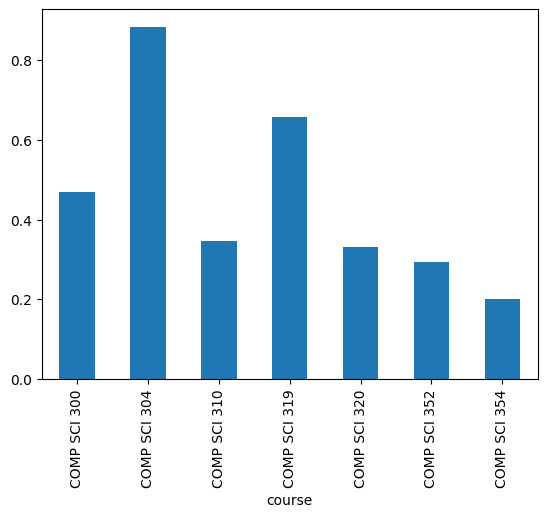

In [30]:
#Q21
percentA.plot.bar()

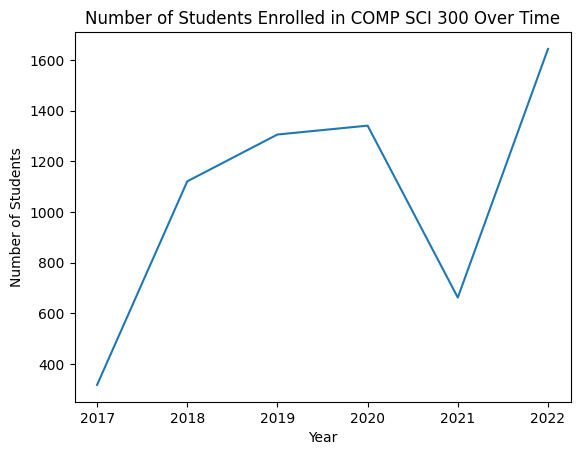

In [31]:
#Q22

totalStud = {}
for key in grades.keys():
    totalStud.update({key: grades.get(key).at["COMP SCI 300", "total"]})
    
# adapted from https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/
sortStud = list(totalStud.keys())
sortStud.sort()
sortedDict = {i: totalStud[i] for i in sortStud}
# sortedDict

x = list(sortedDict.keys())
y = list(sortedDict.values())

#copied from https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.plot(x,y)

plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.title("Number of Students Enrolled in COMP SCI 300 Over Time")

plt.show()


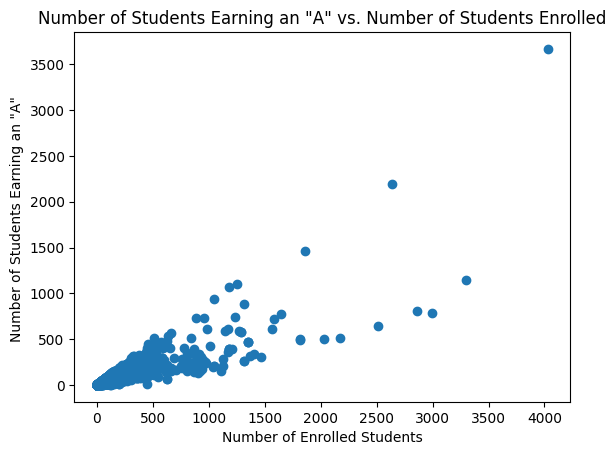

In [32]:
#Q23
# x = total number of students enrolled
# y = number of students earned "A"

for key in grades.keys():
    if key == "2022":
        totalStudents = grades.get(key)["total"]
        totalAs = grades.get(key)["a_count"]


x1 = list(totalStudents)
y1 = list(totalAs)

#adapted from https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
plt.scatter(x1,y1)

plt.xlabel("Number of Enrolled Students")
plt.ylabel("Number of Students Earning an \"A\" ")
plt.title("Number of Students Earning an \"A\" vs. Number of Students Enrolled")

plt.show()